In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [17]:
def efficiency(Ct, Df):
    '''Ct: cycle threshhold (пороговый  цикл) <-- np.array
       Df: delution factor (разведения) <-- np.array '''
    log_Df =  np.log10(1 / Df)
    
    # Построение прямой Линейной регрессии: y = ax + b
    lr = LinearRegression().fit(log_Df.reshape(-1, 1), Ct)
    Ct_pred = lr.predict(log_Df.reshape(-1, 1))
    a = lr.coef_[0]
    
    plt.figure(figsize = (10, 6))
    sns.scatterplot(y = Ct, x = log_Df, color = 'salmon', label = 'Experiment')
    sns.lineplot(y = Ct_pred, x = log_Df, color = 'c', label = 'Predicted')
    plt.legend();
    
    # E: efficiency, SE: slope
    p = np.sqrt(np.sum(np.power(Ct - Ct_pred, 2))) / (len(Ct) - 1)
    E = pow(10, -1/a)
    SE = pow(a, -2) * np.log(10) * p * E
    
    return E, SE

(2.0904735465674595, 0.02491232082750861)

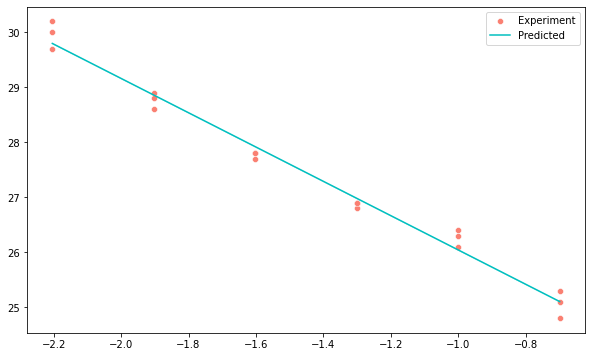

In [19]:
data = pd.read_csv("Ct_Df.csv", index_col = 0)
Ct, Df = data["Ct"].values, data["Df"].values
E, SE = efficiency(Ct, Df)
E, SE